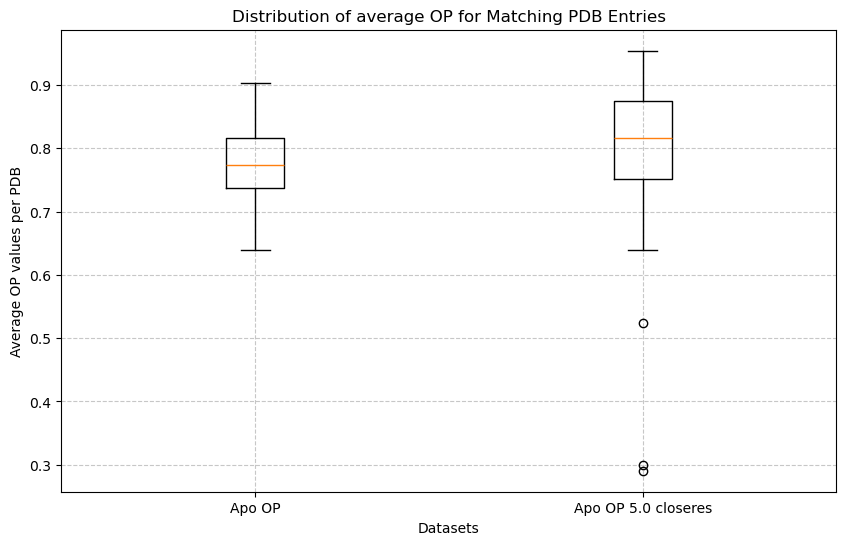

Mann-Whitney U statistic: 3677.0
P-value: 6.688941963910897e-05

Sample size for holo_op: 104
Sample size for holo_5_op: 104

Descriptive Statistics:

 apo_op:
count    104.000000
mean       0.771252
std        0.058283
min        0.638916
25%        0.737747
50%        0.773029
75%        0.815585
max        0.903111
Name: s2calc_apo, dtype: float64

 apo_5_op:
count    104.000000
mean       0.803578
std        0.109981
min        0.290661
25%        0.751184
50%        0.815631
75%        0.874933
max        0.954059
Name: s2calc_apo_5, dtype: float64


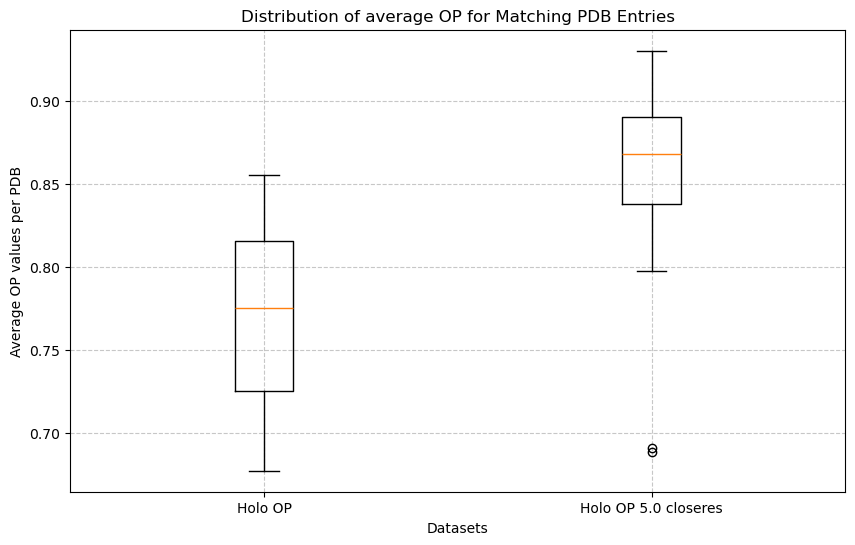

Mann-Whitney U statistic: 51.0
P-value: 0.00016580254152027385

Sample size for holo_op: 19
Sample size for holo_5_op: 19

Descriptive Statistics:

 holo_op:
count    19.000000
mean      0.768133
std       0.060166
min       0.677327
25%       0.725210
50%       0.775111
75%       0.815661
max       0.855535
Name: s2calc_holo, dtype: float64

 holo_5_op:
count    19.000000
mean      0.851853
std       0.066248
min       0.688584
25%       0.838149
50%       0.868035
75%       0.890163
max       0.930231
Name: s2calc_holo_5, dtype: float64
Paired t-test t-statistic: -3.708180525190279
P-value: 0.00033834753323274026

Sample size: 104
Paired t-test t-statistic: -5.751945709692435
P-value: 1.880445867620061e-05

Sample size: 19


In [15]:
""" 
This line of code is to compare the Order Parameter (OP) between both the Apo/Apo 5.0 binding site and Holo/Holo 5.0 binding site, and run a paired T-test & Mann-Whitney U statistical test
"""
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Read the CSV file
df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_pdb_op_summary.csv')

df = df.drop(columns=['delta_op'])
# Filter rows where both b-factor columns have values (not null)
filtered_df = df.dropna(subset=['s2calc_apo', 's2calc_apo_5'])

# Save the filtered data to a new CSV
filtered_df.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_apo_pdb_op_summary.csv', index=False)

apo_filtered_df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_apo_pdb_op_summary.csv')

# Filter for PDbs that exist in both datasets
matching_pdbs = apo_filtered_df.dropna(subset=['s2calc_apo', 's2calc_apo_5'])

# Create figure
plt.figure(figsize=(10, 6))

# Create box plot
data = [matching_pdbs['s2calc_apo'], matching_pdbs['s2calc_apo_5']]
plt.boxplot(data, labels=['Apo OP', 'Apo OP 5.0 closeres'])

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize plot
plt.xlabel('Datasets')
plt.ylabel('Average OP values per PDB')
plt.title('Distribution of average OP for Matching PDB Entries')
# Save first
plt.savefig('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/comparison_apo_op_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

df2 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_apo_pdb_op_summary.csv')
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(df2['s2calc_apo'], 
                                df2['s2calc_apo_5'], 
                                alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Optional: Print sample sizes for verification
print(f"\nSample size for holo_op: {len(df2['s2calc_apo'])}")
print(f"Sample size for holo_5_op: {len(df2['s2calc_apo_5'])}")

# Optional: Print descriptive statistics
print("\nDescriptive Statistics:")
print("\n apo_op:")
print(df2['s2calc_apo'].describe())
print("\n apo_5_op:")
print(df2['s2calc_apo_5'].describe())

# Read the CSV file
df_holo = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_pdb_op_summary.csv')

df_holo = df_holo.drop(columns=['delta_op'])
# Filter rows where both b-factor columns have values (not null)
filtered_df_holo = df_holo.dropna(subset=['s2calc_holo', 's2calc_holo_5'])

# Save the filtered data to a new CSV
filtered_df_holo.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_holo_pdb_op_summary.csv', index=False)

holo_filtered_df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_holo_pdb_op_summary.csv')

# Filter for PDbs that exist in both datasets
matching_pdbs = holo_filtered_df.dropna(subset=['s2calc_holo', 's2calc_holo_5'])

# Create figure
plt.figure(figsize=(10, 6))

# Create box plot
data = [matching_pdbs['s2calc_holo'], matching_pdbs['s2calc_holo_5']]
plt.boxplot(data, labels=['Holo OP', 'Holo OP 5.0 closeres'])

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize plot
plt.xlabel('Datasets')
plt.ylabel('Average OP values per PDB')
plt.title('Distribution of average OP for Matching PDB Entries')
# Save first
plt.savefig('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/comparison_holo_op_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

df3 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_holo_pdb_op_summary.csv')
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(df3['s2calc_holo'], 
                                df3['s2calc_holo_5'], 
                                alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Optional: Print sample sizes for verification
print(f"\nSample size for holo_op: {len(df3['s2calc_holo'])}")
print(f"Sample size for holo_5_op: {len(df3['s2calc_holo_5'])}")

# Optional: Print descriptive statistics
print("\nDescriptive Statistics:")
print("\n holo_op:")
print(df3['s2calc_holo'].describe())
print("\n holo_5_op:")
print(df3['s2calc_holo_5'].describe())


df4 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_apo_pdb_op_summary.csv')

# Perform Paired t-test
t_statistic, p_value = stats.ttest_rel(df4['s2calc_apo'], df4['s2calc_apo_5'])

# Print the results
print(f"Paired t-test t-statistic for Apo: {t_statistic}")
print(f"P-value: {p_value}")

# Optional: Print sample sizes for verification
print(f"\nSample size: {len(df4['s2calc_apo'])}") #Should be the same for both columns if paired


df5 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_holo_pdb_op_summary.csv')

# Perform Paired t-test
t_statistic, p_value = stats.ttest_rel(df5['s2calc_holo'], df5['s2calc_holo_5'])

# Print the results
print(f"Paired t-test t-statistic for Holo: {t_statistic}")
print(f"P-value: {p_value}")

# Optional: Print sample sizes for verification
print(f"\nSample size: {len(df5['s2calc_holo'])}") #Should be the same for both columns if paired